## shanmuka rana prathap chowdary ponnagnti  U97674115

In [2]:
import numpy as np

### Loading  and normalize our data

In [3]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


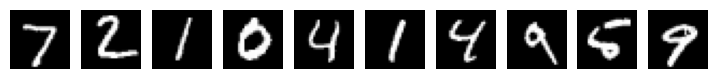

In [4]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Loading  our pretrained model

In [5]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 3s 9ms/step


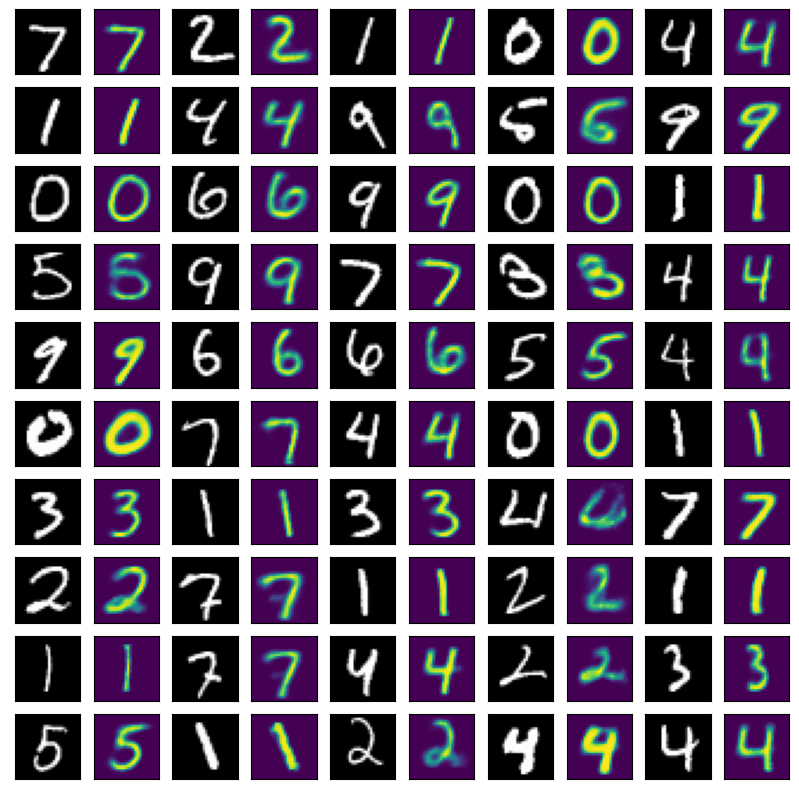

In [6]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [7]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# loading image
rana1 = tf.keras.utils.load_img("r1.png", target_size=(28, 28), color_mode = "grayscale")

rana2 = tf.keras.utils.load_img("r2.png", target_size=(28, 28), color_mode = "grayscale")

rana3 = tf.keras.utils.load_img("r3.png", target_size=(28, 28), color_mode = "grayscale")

rana4 = tf.keras.utils.load_img("r4.png", target_size=(28, 28), color_mode = "grayscale")

rana5 = tf.keras.utils.load_img("r5.png", target_size=(28, 28), color_mode = "grayscale")

In [8]:
new_images = np.vstack([rana1,rana2,rana3,rana4,rana5,])
test_r = new_images.reshape(-1, 784)
train_r = new_images.reshape(-1, 784)
train_r = train_r.astype('float32') /255
test_r = test_r.astype('float32') /255

### oversampling

In [9]:
train_r = np.repeat(train_r[:],25,axis=0)

In [10]:
train_r.shape

(125, 784)

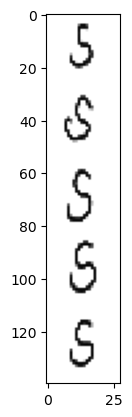

In [11]:
plt.imshow(new_images, cmap="gray")
ax.axis('off')

plt.show()

### Creating an autoencoder model

In [12]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 784 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/10
469/469 [==============================] - 15s 27ms/step - loss: 0.1860 - val_loss: 0.2640
Epoch 2/10
469/469 [==============================] - 17s 35ms/step - loss: 0.1171 - val_loss: 0.3024
Epoch 3/10
469/469 [==============================] - 14s 31ms/step - loss: 0.1027 - val_loss: 0.3070
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0949 - val_loss: 0.3349
Epoch 5/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0904 - val_loss: 0.3617
Epoch 6/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0876 - val_loss: 0.3926
Epoch 7/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0856 - val_loss: 0.4357
Epoch 8/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0840 - val_loss: 0.4643
Epoch 9/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0827 - val_loss: 0.4828
Epoch 10/10
313/313 [==============================] - 3s 8ms/step


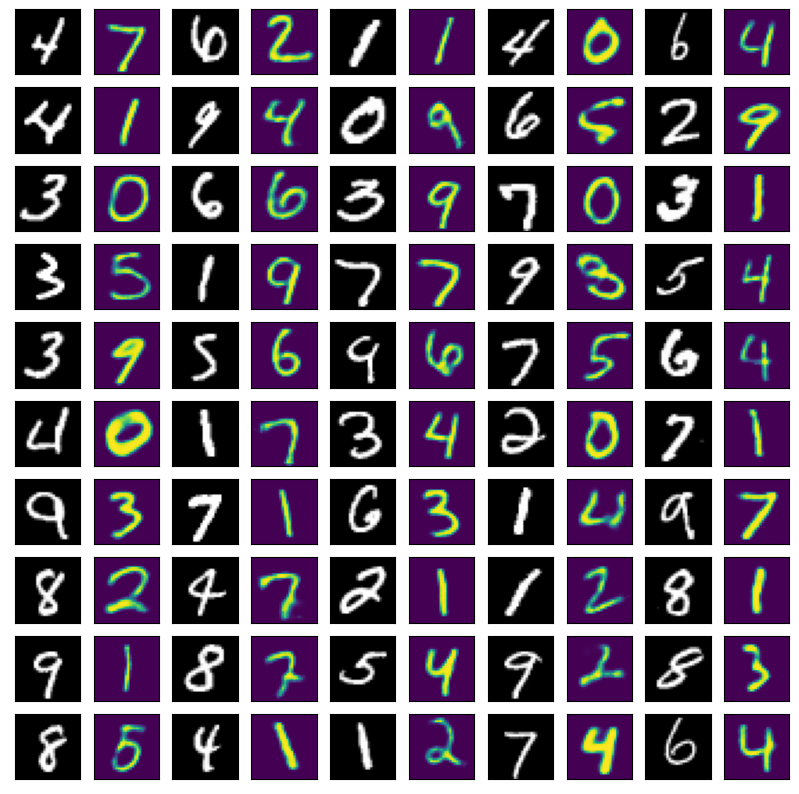

Epoch 1/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0808 - val_loss: 0.5401
Epoch 2/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0802 - val_loss: 0.5655
Epoch 3/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0795 - val_loss: 0.5755
Epoch 4/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0788 - val_loss: 0.5863
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0783 - val_loss: 0.6263
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0778 - val_loss: 0.6242
Epoch 7/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0774 - val_loss: 0.6511
Epoch 8/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0771 - val_loss: 0.6932
Epoch 9/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0766 - val_loss: 0.7094
Epoch 10/10
313/313 [==============================] - 3s 9ms/step


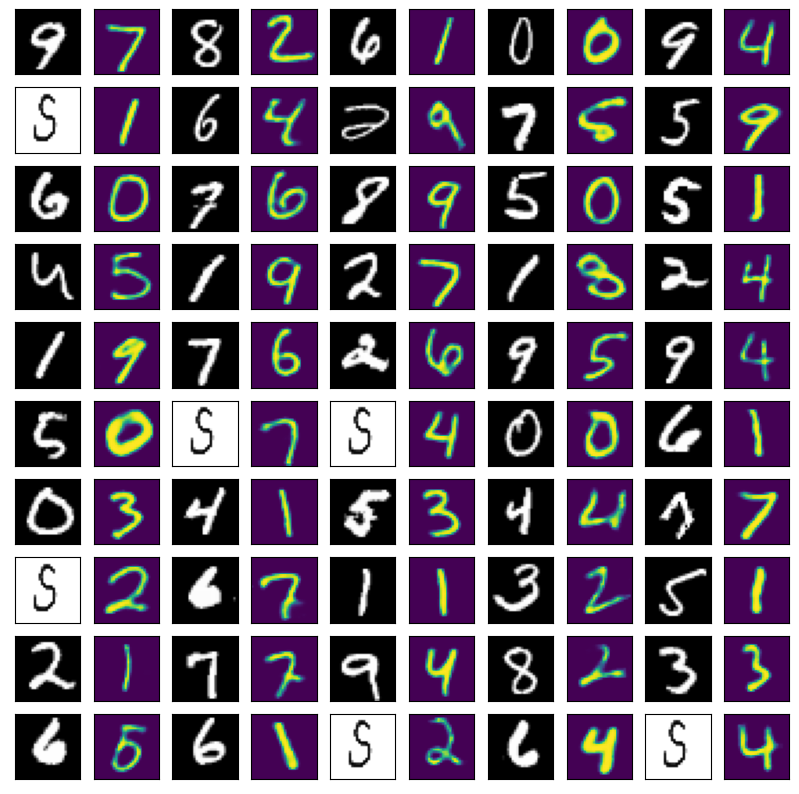

Epoch 1/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0759 - val_loss: 0.7396
Epoch 2/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0757 - val_loss: 0.7742
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0753 - val_loss: 0.7869
Epoch 4/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0752 - val_loss: 0.8032
Epoch 5/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0749 - val_loss: 0.8395
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0746 - val_loss: 0.8477
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0744 - val_loss: 0.8333
Epoch 8/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0741 - val_loss: 0.8184
Epoch 9/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0740 - val_loss: 0.8627
Epoch 10/10
313/313 [==============================] - 3s 9ms/step


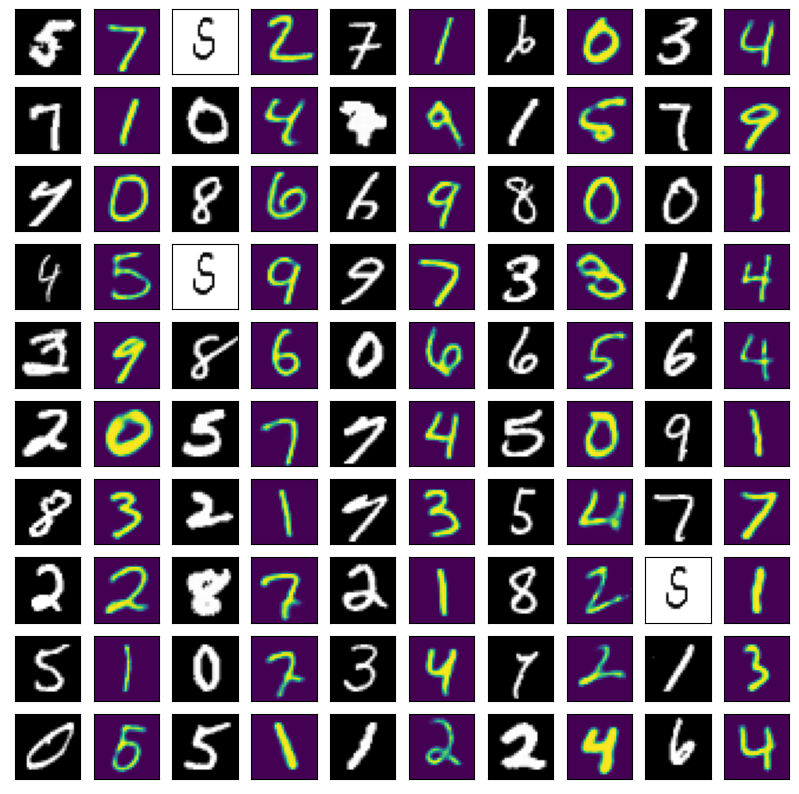

Epoch 1/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0735 - val_loss: 0.7903
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0735 - val_loss: 0.7881
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0732 - val_loss: 0.7888
Epoch 4/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0731 - val_loss: 0.8061
Epoch 5/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0731 - val_loss: 0.8413
Epoch 6/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0729 - val_loss: 0.8379
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0728 - val_loss: 0.8342
Epoch 8/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0726 - val_loss: 0.8340
Epoch 9/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0725 - val_loss: 0.8619
Epoch 10/10
313/313 [==============================] - 3s 8ms/step


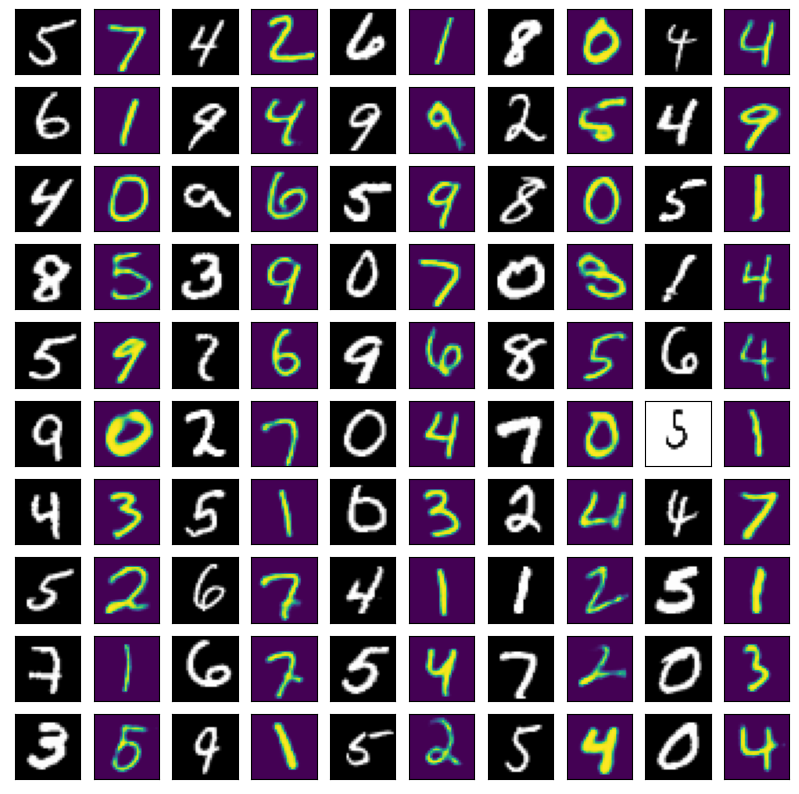

Epoch 1/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0723 - val_loss: 0.9266
Epoch 2/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0722 - val_loss: 0.9174
Epoch 3/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0721 - val_loss: 0.9128
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0720 - val_loss: 0.9666
Epoch 5/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0719 - val_loss: 0.9516
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0719 - val_loss: 0.9472
Epoch 7/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0718 - val_loss: 0.9637
Epoch 8/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0717 - val_loss: 0.9790
Epoch 9/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0716 - val_loss: 0.9892
Epoch 10/10
313/313 [==============================] - 2s 7ms/step


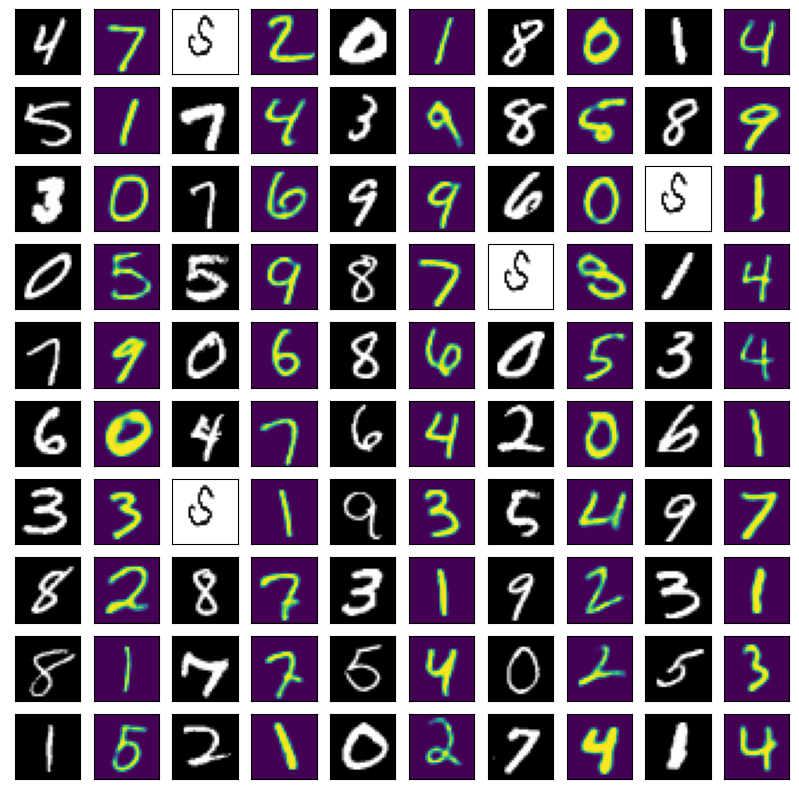

In [15]:
for i in range(5):
    if i >= len(train_r):
        break

    input_arr = train_r[i]

    input_arr = input_arr.reshape(784)

    np.random.shuffle(train_r)

    bad_images = [input_arr for _ in range(135)]
    new_image_set = np.vstack((train_images[:2500], bad_images))
    np.random.shuffle(new_image_set)

    new_images_train = new_image_set[int(len(new_image_set)*.8):]
    new_images_test = new_image_set[int(len(new_image_set)*.2):]

    # Train the autoencoder with MNIST data
    early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
    history = autoencoder.fit(
        x=train_images, # For autoencoders, both the input and the target are the same
        y=train_images, 
        epochs=10, 
        batch_size=128,
        shuffle=True, 
        validation_data=(new_images_test, new_images_test),
        callbacks=[early_stop]
    )
    reconstructed_images = autoencoder.predict(test_images)

    images = []
    for i in range(100):
        images.append(new_images_test[i].reshape(28,28))
        images.append(reconstructed_images[i].reshape(28,28))
    rows = 10
    cols = 10
    plt.figure(figsize=(10,10))
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if (i%2 == 0):
            plt.imshow(images[i],cmap='gray')
        else:
            plt.imshow(images[i])
    plt.show()

In [16]:
autoencoder.save('we11 rana autoencoder.h5')

# When the MNIST dataset and photos are run simultaneously in this model, the model is unable to correctly predict the images.